In [2]:
# import libraries 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

from collections import defaultdict, Counter, OrderedDict

from xgboost import XGBClassifier

In [3]:
# reading in .csv file

df = pd.read_csv('voterfile.csv')

df.head()

,optimus_id,age,party,ethnicity,maritalstatus,dwellingtype,income,education,cd,dma,...,intrst_musical_instruments_in_hh,donates_to_liberal_causes,donates_to_conservative_causes,home_owner_or_renter,g08_precinct_turnout,g10_precinct_turnout,g12_precinct_turnout,p08_precinct_turnout,p10_precinct_turnout,p12_precinct_turnout
0,861681,69.0,Republican,European,Married,Single Family Dwelling Unit,75k-125k,Bach Degree - Extremely Likely,4.0,LAS VEGAS DMA (EST.),...,NaN,NaN,NaN,Likely Homeowner,0.56,0.54,0.75,0.17,0.32,0.24
1,1084850,20.0,American Independent,European,NaN,NaN,Unknown,NaN,2.0,RENO DMA (EST.),...,NaN,NaN,NaN,NaN,0.84,0.82,0.92,0.47,0.62,0.47
2,644435,28.0,Non-Partisan,European,NaN,NaN,Unknown,NaN,3.0,LAS VEGAS DMA (EST.),...,NaN,NaN,NaN,NaN,0.49,0.34,0.70,0.04,0.09,0.06
3,57683,78.0,American Independent,European,Married,NaN,Unknown,NaN,3.0,LAS VEGAS DMA (EST.),...,NaN,NaN,NaN,NaN,0.84,0.79,0.91,0.24,0.46,0.30
4,167371,68.0,Democratic,NaN,NaN,NaN,Unknown,NaN,4.0,LAS VEGAS DMA (EST.),...,NaN,NaN,NaN,NaN,0.71,0.66,0.81,0.19,0.37,0.34


In [4]:
# checking for non-null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 39 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   optimus_id                        50000 non-null  int64  
 1   age                               49983 non-null  float64
 2   party                             50000 non-null  object 
 3   ethnicity                         44808 non-null  object 
 4   maritalstatus                     19362 non-null  object 
 5   dwellingtype                      23917 non-null  object 
 6   income                            50000 non-null  object 
 7   education                         27590 non-null  object 
 8   cd                                49996 non-null  float64
 9   dma                               50000 non-null  object 
 10  occupationindustry                8192 non-null   object 
 11  vh14p                             50000 non-null  int64  
 12  vh12

In [5]:
# getting rid of rows with NaN values/no values
df_clean = df.dropna(subset = ['age','party','ethnicity','education',
                                'income'])

df_clean = df_clean.dropna(axis='columns')

# dropping cd, dma 
df_clean = df_clean.drop(['cd','dma'],axis=1)

# dropping precinct turnout as well
df_clean = df_clean.drop(df_clean.columns[21:27],axis=1)

# copy of df_clean
df_clean_copy = df_clean.copy()


In [6]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24930 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   optimus_id  24930 non-null  int64  
 1   age         24930 non-null  float64
 2   party       24930 non-null  object 
 3   ethnicity   24930 non-null  object 
 4   income      24930 non-null  object 
 5   education   24930 non-null  object 
 6   vh14p       24930 non-null  int64  
 7   vh12g       24930 non-null  int64  
 8   vh12p       24930 non-null  int64  
 9   vh10g       24930 non-null  int64  
 10  vh10p       24930 non-null  int64  
 11  vh08g       24930 non-null  int64  
 12  vh08p       24930 non-null  int64  
 13  vh06g       24930 non-null  int64  
 14  vh06p       24930 non-null  int64  
 15  vh04g       24930 non-null  int64  
 16  vh04p       24930 non-null  int64  
 17  vh02g       24930 non-null  int64  
 18  vh02p       24930 non-null  int64  
 19  vh00g       24930 non-nul

In [7]:
df_clean.party.unique()

df_clean['party_val'] = le.fit_transform(df_clean['party'])
df_clean['ethnicity_val'] = le.fit_transform(df_clean['ethnicity'])
df_clean['income_val'] = le.fit_transform(df_clean['income'])
df_clean['education_val'] = le.fit_transform(df_clean['education'])

df_clean

,optimus_id,age,party,ethnicity,income,education,vh14p,vh12g,vh12p,vh10g,...,vh04g,vh04p,vh02g,vh02p,vh00g,vh00p,party_val,ethnicity_val,income_val,education_val
0,861681,69.0,Republican,European,75k-125k,Bach Degree - Extremely Likely,0,0,0,1,...,1,0,1,0,1,0,7,2,4,0
5,974034,69.0,Democratic,European,75k-125k,HS Diploma - Likely,0,0,0,0,...,1,1,1,0,1,0,1,2,4,5
8,720804,53.0,Democratic,European,35k-75k,HS Diploma - Extremely Likely,0,0,0,1,...,0,0,0,0,0,0,1,2,3,4
9,547190,30.0,Non-Partisan,Asian,200k+,Some College - Likely,0,0,0,1,...,0,0,1,0,1,0,5,1,2,8
12,588688,47.0,Democratic,European,75k-125k,HS Diploma - Extremely Likely,0,0,0,1,...,0,0,1,0,0,0,1,2,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,700873,75.0,Republican,European,0-35k,HS Diploma - Extremely Likely,0,0,0,0,...,0,0,0,0,1,0,7,2,0,4
49995,251398,23.0,American Independent,European,125k-200k,Some College -Extremely Likely,0,0,0,0,...,0,0,1,0,0,0,0,2,1,9
49997,369815,28.0,Non-Partisan,European,35k-75k,HS Diploma - Likely,0,0,0,0,...,0,0,0,0,1,0,5,2,3,5
49998,276455,49.0,Republican,European,75k-125k,HS Diploma - Extremely Likely,0,0,1,1,...,1,0,1,1,1,0,7,2,4,4


In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24930 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   optimus_id     24930 non-null  int64  
 1   age            24930 non-null  float64
 2   party          24930 non-null  object 
 3   ethnicity      24930 non-null  object 
 4   income         24930 non-null  object 
 5   education      24930 non-null  object 
 6   vh14p          24930 non-null  int64  
 7   vh12g          24930 non-null  int64  
 8   vh12p          24930 non-null  int64  
 9   vh10g          24930 non-null  int64  
 10  vh10p          24930 non-null  int64  
 11  vh08g          24930 non-null  int64  
 12  vh08p          24930 non-null  int64  
 13  vh06g          24930 non-null  int64  
 14  vh06p          24930 non-null  int64  
 15  vh04g          24930 non-null  int64  
 16  vh04p          24930 non-null  int64  
 17  vh02g          24930 non-null  int64  
 18  vh02p 

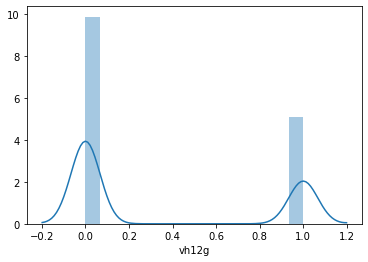

In [9]:
import seaborn as sns

sns.distplot(df_clean['vh12g'])

In [10]:
# independent variable X 
# X does not have column vh12g, optimus_id
X = df_clean.drop(['vh12g','optimus_id','party','ethnicity','education','income'], 
                  axis=1)


# dependent variable y
# y has column vh12g only
y = df_clean.vh12g

# X.shape, y.shape
X.head()
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24930 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            24930 non-null  float64
 1   vh14p          24930 non-null  int64  
 2   vh12p          24930 non-null  int64  
 3   vh10g          24930 non-null  int64  
 4   vh10p          24930 non-null  int64  
 5   vh08g          24930 non-null  int64  
 6   vh08p          24930 non-null  int64  
 7   vh06g          24930 non-null  int64  
 8   vh06p          24930 non-null  int64  
 9   vh04g          24930 non-null  int64  
 10  vh04p          24930 non-null  int64  
 11  vh02g          24930 non-null  int64  
 12  vh02p          24930 non-null  int64  
 13  vh00g          24930 non-null  int64  
 14  vh00p          24930 non-null  int64  
 15  party_val      24930 non-null  int32  
 16  ethnicity_val  24930 non-null  int32  
 17  income_val     24930 non-null  int32  
 18  educat

In [11]:
# splitting into train and test data, 20% test data
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.2)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((19944, 19), (4986, 19), (19944,), (4986,))

In [12]:
print(Counter(y_test))

Counter({0: 3286, 1: 1700})


In [13]:
# using XGBClassifier, no tuning

model = XGBClassifier()

# fit
model.fit(x_train, y_train)

# predict 
y_pred = model.predict(x_test)

# accuracy score - how accurate classification is
accuracy_score(y_test,y_pred)

C:\Users\steph\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:28:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8459687123947052

In [15]:
y_pred
len(y_pred)

4986

In [16]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

model = XGBClassifier(learning_rate=0.4, n_estimators=2000, max_depth=6, min_child_weight=40, 
                      gamma=0.4,nthread=10, subsample=0.8, colsample_bytree=0.8, 
                      objective= 'binary:logistic',scale_pos_weight=10,seed=2, random_state=1)
model.fit(x_train, y_train)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, model.predict(x_train))
print(auc(false_positive_rate, true_positive_rate))

[17:28:43] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9299026319793092


In [17]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=0.4, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.4, max_delta_step=0, max_depth=6,
              min_child_weight=40, missing=nan, monotone_constraints='()',
              n_estimators=2000, n_jobs=10, nthread=10, num_parallel_tree=1,
              predictor='auto', random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=10, seed=2, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [18]:
# make predictions on test data
y_pred = model.predict(x_test)
# score of test data
print(model.score(x_test,y_test))
# score of train data
print(model.score(x_train,y_train))

0.8164861612515042
0.9075912555154433


In [19]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
6781,0,1
37906,0,0
9633,0,0
26243,0,0
19964,1,0
...,...,...
26168,1,1
4182,1,1
34108,0,0
45854,1,1


In [20]:
# make predictions on X_test

X_test = X.copy()

# predict_proba() gives 2D array
# predict the probability that person WOULD turnout 
prediction_prob = model.predict_proba(X_test)[:,1]


X_test['vh14g/vote'] = model.predict(X_test)

X_test.insert(20,'vote_prob', prediction_prob)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24930 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            24930 non-null  float64
 1   vh14p          24930 non-null  int64  
 2   vh12p          24930 non-null  int64  
 3   vh10g          24930 non-null  int64  
 4   vh10p          24930 non-null  int64  
 5   vh08g          24930 non-null  int64  
 6   vh08p          24930 non-null  int64  
 7   vh06g          24930 non-null  int64  
 8   vh06p          24930 non-null  int64  
 9   vh04g          24930 non-null  int64  
 10  vh04p          24930 non-null  int64  
 11  vh02g          24930 non-null  int64  
 12  vh02p          24930 non-null  int64  
 13  vh00g          24930 non-null  int64  
 14  vh00p          24930 non-null  int64  
 15  party_val      24930 non-null  int32  
 16  ethnicity_val  24930 non-null  int32  
 17  income_val     24930 non-null  int32  
 18  educat

In [21]:
X_test.insert(0,'optimus_id',df_clean['optimus_id'])
X_test.insert(1,'party',df_clean['party'])
X_test.insert(2,'ethnicity',df_clean['ethnicity'])
X_test.insert(3,'income',df_clean['income'])
X_test.insert(4,'education',df_clean['education'])



In [22]:
X_test.drop(['party_val','ethnicity_val','income_val','education_val'], 
                  axis=1, inplace=True)

In [23]:
X_test.insert(18,'vh12g', y)


In [24]:
X_test.head()

,optimus_id,party,ethnicity,income,education,age,vh14p,vh12p,vh10g,vh10p,...,vh06p,vh04g,vh04p,vh02g,vh02p,vh12g,vh00g,vh00p,vh14g/vote,vote_prob
0,861681,Republican,European,75k-125k,Bach Degree - Extremely Likely,69.0,0,0,1,0,...,0,1,0,1,0,0,1,0,1,0.929558
5,974034,Democratic,European,75k-125k,HS Diploma - Likely,69.0,0,0,0,0,...,1,1,1,1,0,0,1,0,0,0.009875
8,720804,Democratic,European,35k-75k,HS Diploma - Extremely Likely,53.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.285217
9,547190,Non-Partisan,Asian,200k+,Some College - Likely,30.0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0.056325
12,588688,Democratic,European,75k-125k,HS Diploma - Extremely Likely,47.0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0.152756


In [25]:
X_test.to_csv('predict_vh14g.csv', encoding='utf-8',index=False)